## dependencias

In [ ]:
import sys
import numpy as np
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

## Ejercicio 1

### datos

In [ ]:
a_matrix =         np.array([[ 1,  1,  1,  1, 10],
                    [ 1,  1,  1,  1, 11],
                    [ 1,  1,  1,  1, 12],
                    [ 1,  1,  1,  1, 13]]).astype(np.float64)
a_matrix

### implementacion

In [ ]:
##item a
def elim_gauss_sin_pivot(M): 
   for i in range(0, len(M[0]) - 2):
    for j in range(i+1, len(M)):
      if M[i][i] != 0:
        m_ji = M[j][i]/M[i][i]
        for k in range(i,len(M[0])):
          M[j][k] = M[j][k] - m_ji * M[i][k]
      else:
        for jerror in range(i+1, len(M)):
          if M[jerror][i] != 0:
            raise Exception("No se puede realizar la eliminacion gaussiana con i:" + str(i) + " y j: " + str(j))
   return M

def solve_sys_EGsin(M):
  M_res = elim_gauss_sin_pivot(M)
  x = back_subs(M_res)
  return x

def back_subs(M):
  n = len(M)
  x=[]
  for i in range(n):
    x.append(np.float64(0))
  for i in reversed(range(n)):
    x[i]= (M[i][n-1])
    if(M[i][i]!=0.0):
      for j in range(i+1,n):
        if(M[i][j]!=0.0):
          x[i]= x[i]- M[i][j]*x[j] 
      x[i] = x[i]/M[i][i]
    else:
      x[i]= f"x{i}"
  return x

elim_gauss_sin_pivot(a_matrix)
#solve_sys_EGsin(a_matrix)



## Ejercicio 2

### Datos

In [95]:
b_matrix =         np.array([[ 1,  1,  1,  1, 10],
                    [ 1,  1,  1,  1, 11],
                    [ 1,  2,  1,  1, 12],
                    [ 1,  2,  1,  1, 13]]).astype(np.float64)

a_matrix2 = np.array([[ 1,  1,  0,  0, 0],
                     [ 2,  0,  0,  0, 0],
                     [ 0,  2,  1,  4, 0],
                     [ 0,  0,  2,  1, 0]]).astype(np.float64)

#Funcion para la experimentacion del item c)
def create_matrix_with_epsilon_float64(epsilon):
    c_matrix = np.array([[ 1,  2+epsilon,  3-epsilon,  6],
                     [ 1-epsilon,  2,  3+epsilon,  6],
                     [ 1+epsilon,  2-epsilon,  3,  6]]).astype(np.float64)
    return c_matrix

def create_matrix_with_epsilon_float32(epsilon):
    c_matrix = np.array([[ 1,  2+epsilon,  3-epsilon,  6],
                     [ 1-epsilon,  2,  3+epsilon,  6],
                     [ 1+epsilon,  2-epsilon,  3,  6]]).astype(np.float32)
    return c_matrix

x_64=np.array([1,1,1]).astype(np.float64)
x_32=np.array([1,1,1]).astype(np.float32)
for i in np.logspace(1e-6, 10, endpoint=True):
    print(create_matrix_with_epsilon_float64(i))

[[ 1.00000000e+00  3.00000230e+00  1.99999770e+00  6.00000000e+00]
 [-2.30258774e-06  2.00000000e+00  4.00000230e+00  6.00000000e+00]
 [ 2.00000230e+00  9.99997697e-01  3.00000000e+00  6.00000000e+00]]
[[ 1.          3.59986233  1.40013767  6.        ]
 [-0.59986233  2.          4.59986233  6.        ]
 [ 2.59986233  0.40013767  3.          6.        ]]
[[ 1.          4.55955358  0.44044642  6.        ]
 [-1.55955358  2.          5.55955358  6.        ]
 [ 3.55955358 -0.55955358  3.          6.        ]]
[[ 1.          6.09492391 -1.09492391  6.        ]
 [-3.09492391  2.          7.09492391  6.        ]
 [ 5.09492391 -2.09492391  3.          6.        ]]
[[ 1.          8.55129942 -3.55129942  6.        ]
 [-5.55129942  2.          9.55129942  6.        ]
 [ 7.55129942 -4.55129942  3.          6.        ]]
[[ 1.         12.48115301 -7.48115301  6.        ]
 [-9.48115301  2.         13.48115301  6.        ]
 [11.48115301 -8.48115301  3.          6.        ]]
[[  1.          18.76836325 

### Codigo

In [61]:
##item a
def elim_gauss_con_pivot(M, threshold): 
   for i in range(0, len(M[0]) - 2):
    #Buscamos la fila de maximo valor para permutar
    j_max=i
    val_j_max=0
    for j_pivot in range(i+1, len(M)):
      if abs(M[j_pivot][i]) > val_j_max:
        val_j_max = abs(M[j_pivot][i])
        j_max = j_pivot
    #Permutamos 
    for p in range(i, len(M[0])):
      m_ip = M[i][p]
      M[i][p] = M[j_max][p]
      M[j_max][p] = m_ip 
    #Hacemos el paso de eliminacion gaussiana 
    for j in range(i+1, len(M)):
      if M[i][i] != 0:  
        # if(float(M[i][i]) <=threshold):
        #   print("Advertencia de error numerico, division por valor cercano a cero")
        m_ji = float(M[j][i])/float(M[i][i])
        for k in range(i,len(M[0])):
          M[j][k] = M[j][k] - m_ji * M[i][k]
      else:
        for jerror in range(i+1, len(M)):
          if M[jerror][i] != 0:
            raise Exception("No se puede realizar la eliminacion gaussiana con i:" + str(i) + " y j: " + str(j))
   return M

def solve_sys_EG(M, threshold):
  M_res = elim_gauss_con_pivot(M, threshold)
  x = []
  for i in range(0,len(M)):
    x.append(M[i][len(M[0])-2])
  return x

elim_gauss_con_pivot(a_matrix2, 0.0001)

##item b, matriz diagonal con algun a_ii=0 y b_i!=0
matrix_no_solution = np.array([[ 1,  0,  0, 1],
                               [ 2,  0,  0, 1],
                               [ 0,  0,  0, 2],
                               [ 0,  0,  1, 1]]).astype(np.float64)

##item c
def inf_norm(v, w):
  res=0
  for i in range(len(v)):
    res = max(res, abs(v[i]-w[i]))
  return res

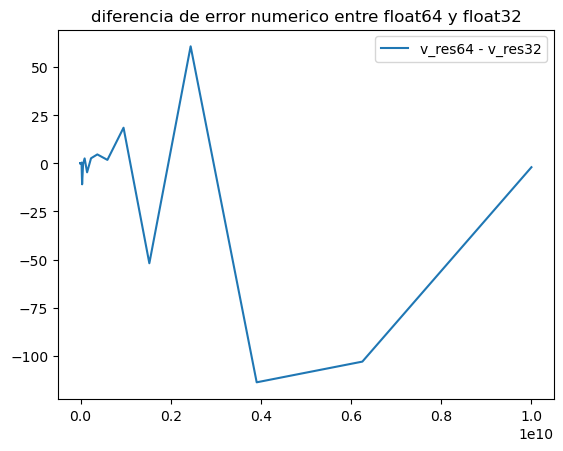

In [96]:
def numeric_error_exp(x):
  v_epsilon = np.logspace(1e-6, 10, endpoint=True)
  threshold = 1e-10
  v_res64 = np.zeros(len(v_epsilon))
  v_res32 = np.zeros(len(v_epsilon))

  for i in range(len(v_epsilon)):
    matrix_c = create_matrix_with_epsilon_float64(v_epsilon[i])
    x_obt = solve_sys_EG(matrix_c, threshold)
    v_res64[i] = inf_norm(x_obt, x_64)

  for i in range(len(v_epsilon)):
    matrix_c = create_matrix_with_epsilon_float32(v_epsilon[i])
    x_obt = solve_sys_EG(matrix_c, threshold)
    v_res32[i] = inf_norm(x_obt, x_32)

  fig, ax = plt.subplots( nrows=1, ncols=1 )
  ax.plot(v_epsilon, v_res64 - v_res32, label = "v_res64 - v_res32")
  #ax.plot(v_epsilon, v_res32, label = ".float32")
  
  # print(v_res64 - v_res32)
  ax.set_title('diferencia de error numerico entre float64 y float32')
  ax.legend()
  plt.show()
  # plt.savefig('error_numerico_exp')

numeric_error_exp(x)


## Ejercicio 3

### datos

In [ ]:
matriz_tridiagonal_facil =  np.array(
                   [[ 4,  8,  0, 1],
                    [ 2,  8,  16, 8],
                    [ 0,  8,  2, 13]]).astype(np.float64)

print(elim_gauss_sin_pivot(matriz_tridiagonal_facil))
solve_sys_EGsin(matriz_tridiagonal_facil)

### implementacion

# todo cambiar listas arrays de numpy

In [127]:

def coeficientes_elim_gauss_tridiaognal(M):
  coeficientes_computados = []
  for i in range(0, len(M)):
    c_prima = 0
    if i == 0:
      c_prima = M[i][i + 1] /  M[i][i]
    else:
      c_prima = M[i][i + 1] /  (M[i][i] - (M[i][i - 1] * coeficientes_computados[i-1])) #un coeficientes_computados.pop() tambien funcionaria

    coeficientes_computados.append(c_prima)
  return coeficientes_computados

def term_indep_elim_gauss_tridiagonal(M, coeficientes_computados):
  terminos_indep_computados = []
  for i in range(0, len(M)):
    d_prima = 0
    if i == 0:
      d_prima = M[i][len(M[i]) - 1] /  M[i][i]
    else:
      d_prima = (M[i][len(M[i]) - 1] - (M[i][i - 1] * terminos_indep_computados[i - 1])) /  (M[i][i] - M[i][i - 1] * coeficientes_computados[i-1]) #un coeficientes_computados.pop() tambien funcionaria

    terminos_indep_computados.append(d_prima)
  return terminos_indep_computados  

def elim_gauss_tridiaognal(M):
  coeficientes = coeficientes_elim_gauss_tridiaognal(M)
  terminos_independientes = term_indep_elim_gauss_tridiagonal(M, coeficientes)

  res = np.zeros(len(terminos_independientes))
  res[len(terminos_independientes) - 1] = terminos_independientes[len(terminos_independientes) - 1]
  for i in range(len(res) - 2, -1, -1):
    res[i] = terminos_independientes[i] - (coeficientes[i] * res[i+1]) 
  
  return res


elim_gauss_tridiaognal(matriz_tridiagonal_facil)

array([-2.96666667,  1.60833333,  0.06666667])

## Ejercicio 4


### Datos

In [ ]:
d_a = []

for i in range(0, 102):
    value = 0
    if i == ((101 // 2) + 1):
        value = 4/101
    d_a.append(value)


In [ ]:

d_b = np.full(101, np.float64(4) / np.float64(101**2))

In [140]:
d_c = []
n = 101
for i in range(0, 102):
    value =  (np.float64(-1 + 2*i) / np.float64(n - 1)) * (np.float64(12) / np.float64(n*n))
    d_c.append(value)
d_c

[-1.176355259288305e-05,
 1.176355259288305e-05,
 3.529065777864915e-05,
 5.8817762964415255e-05,
 8.234486815018136e-05,
 0.00010587197333594745,
 0.00012939907852171356,
 0.00015292618370747965,
 0.00017645328889324575,
 0.00019998039407901187,
 0.00022350749926477797,
 0.00024703460445054407,
 0.00027056170963631016,
 0.00029408881482207626,
 0.00031761592000784236,
 0.00034114302519360845,
 0.00036467013037937455,
 0.0003881972355651407,
 0.00041172434075090674,
 0.00043525144593667284,
 0.000458778551122439,
 0.00048230565630820503,
 0.0005058327614939712,
 0.0005293598666797373,
 0.0005528869718655034,
 0.0005764140770512695,
 0.0005999411822370356,
 0.0006234682874228017,
 0.0006469953926085679,
 0.0006705224977943339,
 0.0006940496029801,
 0.000717576708165866,
 0.0007411038133516321,
 0.0007646309185373984,
 0.0007881580237231644,
 0.0008116851289089304,
 0.0008352122340946965,
 0.0008587393392804626,
 0.0008822664444662288,
 0.0009057935496519949,
 0.000929320654837761,
 0.00

In [113]:
d = []
for i in range(0, 101):
    d.append(i)

def create_matrix_with_d(d):
    m_res = np.zeros((101,102)).astype(np.float64)
    for i in range(101):
        m_res[i][i]=-2
        if(i+1<=100):
            m_res[i+1][i]=1
            m_res[i][i+1]=1    
    for i in range(101):
        m_res[i][101]= d[i]
    return m_res  

create_matrix_with_d(d)      

array([[ -2.,   1.,   0., ...,   0.,   0.,   0.],
       [  1.,  -2.,   1., ...,   0.,   0.,   1.],
       [  0.,   1.,  -2., ...,   0.,   0.,   2.],
       ...,
       [  0.,   0.,   0., ...,   1.,   0.,  98.],
       [  0.,   0.,   0., ...,  -2.,   1.,  99.],
       [  0.,   0.,   0., ...,   1.,  -2., 100.]])

In [144]:
def verificacion_exp(ds):
  
  x = range(0, 101)
  x_ds = np.zeros((3, 101))
  for i in range(2):
    matrix_c = create_matrix_with_d(ds[i])
    x_ds[i] = elim_gauss_tridiaognal(matrix_c)
  
  matrix_c = create_matrix_with_d(ds[2])
  x_ds[2] = solve_sys_EG(matrix_c, 0.00001)

  fig, ax = plt.subplots( nrows=1, ncols=1 )
  plt.plot(x[:90], x_ds[0][:90], label = "(a)")
  plt.plot(x[:90], x_ds[1][:90], label = "(b)")
  plt.plot(x[:90], x_ds[2], label = "(c)")
  print(x_ds[2])
  plt.show()
  fig.savefig('verificacion_exp.pdf')
  return

verificacion_exp([d_a, d_b, d_c])

[   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    1.   -2. -102.]
